# **4 – Model Developmemt**

## Objectives
* Build and train a CNN to classify cherry leaf images as either healthy or diseased
* Evaluate model performance and save it for deployment

## Inputs
* Train/val/test folders from inputs/dataset

## Outputs
- Trained CNN model
- Accuracy/loss plots
- Evaluation results on test set


---

# Change working directory

Change the working directory from its current folder to its parent folder

In [1]:
import os

project_dir = r"C:\Users\amyno\OneDrive\Documents\CherryLeafProject\milestone-project-mildew-detection-in-cherry-leaves"

os.chdir(project_dir)

print(f" Current working directory is now: {os.getcwd()}")

 Current working directory is now: C:\Users\amyno\OneDrive\Documents\CherryLeafProject\milestone-project-mildew-detection-in-cherry-leaves


In [27]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amyno\\OneDrive\\Documents\\CherryLeafProject\\milestone-project-mildew-detection-in-cherry-leaves'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [28]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [29]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amyno\\OneDrive\\Documents\\CherryLeafProject'

---

# Load image datasets

Load the preprocessed cherry leaf images from the inputs/dataset directory using TensorFlow.

TensorFlow's image-data-set-from-directory function will efficiently feed the data into the model in batches, while also keeping the images labelled and shuffled automatically

Install tensorflow

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\amyno\onedrive\documents\cherryleafproject\milestone-project-mildew-detection-in-cherry-leaves\venv\lib\site-packages (2.19.0)




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import tensorflow's image_dataset_from_directory

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

Determine batch size and image size

In [5]:
img_size = (256, 256)
batch_size = 32

The most common batch size (how many images the model will process at one time) is 32. This is a sensible number for this project. Whilst it may take longer, the model will be more accurate and less susceptable to overfitting

The image size was checked during the data prep notebook, but it is a good idea to put extra safeguards in place 

Load training, validation and test datasets from inputs directory

In [6]:
import os

os.chdir("C:/Users/amyno/OneDrive/Documents/CherryLeafProject/milestone-project-mildew-detection-in-cherry-leaves")

print("New Working Directory:", os.getcwd())

New Working Directory: C:\Users\amyno\OneDrive\Documents\CherryLeafProject\milestone-project-mildew-detection-in-cherry-leaves


In [7]:
train_ds = image_dataset_from_directory( #code helpfully inspired by Keras (ref. in readme)
    "inputs/dataset/train",
    labels="inferred",
    label_mode="binary", 
    image_size=img_size,
    batch_size=batch_size,
    seed=123
)

Found 2944 files belonging to 2 classes.


In [8]:
import os
print(os.getcwd())

C:\Users\amyno\OneDrive\Documents\CherryLeafProject\milestone-project-mildew-detection-in-cherry-leaves


In [9]:
val_ds = image_dataset_from_directory(
    "inputs/dataset/val",
    labels="inferred",
    label_mode="binary",
    image_size=img_size,
    batch_size=batch_size,
    seed=123
)

Found 632 files belonging to 2 classes.


In [10]:
test_ds = image_dataset_from_directory(
    "inputs/dataset/test",
    labels="inferred",
    label_mode="binary",
    image_size=img_size,
    batch_size=batch_size,
    seed=123
)

Found 632 files belonging to 2 classes.


All of the datasets are loaded and are showing the expected number of images in each, with the 2 classes referring to the healthy and powdery mildew classes

---

# Normalise image data

normalise the pixel values of the images to ensure there is a consistant input. This transforms the pixel values from the [0, 255] range to [0, 1], which speeds up training and improves model performance


import TensorFlow as tf

In [11]:
import tensorflow as tf

In [12]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Check a random batch to see if images are as expected 

Import matplotlib

In [13]:
import matplotlib.pyplot as plt

Access one batch of the images and display 9 random images from that batch

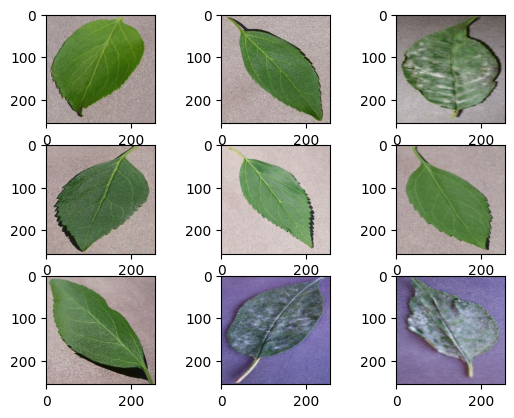

In [14]:
for images, labels in train_ds.take(1):
    plt.figure
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
    break

All images appear uniform

---

# Cache and prefetch the datasets

This will optimise the data pipeline using tensorflow dataset cache and prefetch. It improves performance during training by keeping the dataset in memory (cache) and preparing the next batch while the current one is being processed (prefetch)

In [27]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

---

# Build the model architecture

This model will be built a as Convolutional Neural Network (CNN)

The model is a CNN with three convolutional layers followed by a max pooling layer 

Import keras and layers form tensorflow

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\amyno\OneDrive\Documents\CherryLeafProject\milestone-project-mildew-detection-in-cherry-leaves\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* **Conv2D and ReLU**: These layers detect features in the image like edges or patterns

* **MaxPooling2D**: These layers reduce the size of the image after each convolution, keeping the most important information and helping the model run faster

* **Flatten**: Turns the 2D image data into a 1D vector so it can be used by the final layers

* **Dense(128)**: A fully connected layer that helps the model combine all the features it's learned

The output layer then gives a value between 0 and 1 — closer to 0 means healthy, closer to 1 means diseased

This setup is the standard for image classification and is simple enough to train quickly


---

# Compile the model

Set the loss function, optimizer and metrics

In [18]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Loss function 
* I have used binary crossentropy because it's only predicting one of two classes. This will measure how far off the model's predictions are from the actual results

### Optimizer
* The optimizer used is adam. This will adapt the learning rate during training

### Metrics
* The performance measurement to track during training and validation is the accuracy

---

### Credits
* TensorFlow tutorial
* Keras documentation
* Stack overfow and Wikipedia for image normalization

---

Fit the model using training and validation datasets

In [28]:
print(f"Train batches: {len(train_ds)}")
print(f"Validation batches: {len(val_ds)}")


print(f"Class names: {train_ds.class_names}")


Train batches: 92
Validation batches: 20


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [25]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 1.0000 - loss: 2.0511e-05 - val_accuracy: 1.0000 - val_loss: 3.3352e-04
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 1.0000 - loss: 1.7555e-05 - val_accuracy: 1.0000 - val_loss: 3.0719e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 1.0000 - loss: 1.1853e-05 - val_accuracy: 1.0000 - val_loss: 3.4245e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 1.0000 - loss: 9.4494e-06 - val_accuracy: 1.0000 - val_loss: 2.0310e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 1.0000 - loss: 8.0544e-06 - val_accuracy: 1.0000 - val_loss: 2.7751e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 1.0000 - loss: 8.8280e-06 - val_accuracy: 1.0000 - val_loss: 2.2472e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 1.0000 - loss: 8.7083e-06 - val_accuracy: 1.0000 - val_loss: 1.7888e-04
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 675ms/step - ac

The epoch (one complete pass of the data) is currently set to 10 but can be adjusted if needed 

## Model evaluation summary

The model was trained for 10 epochs and achieved the following results:
* Final training accuracy: 100%
* Final validation accuracy: 100%
* Final training loss: ~0.00006
* Final validation loss: ~0.00031

---

# Save the model

Save the trained model to new directory. This ensures the trained model architecture are preserved for future evaluation and it's eventuall deployment in the Streamlit dashboard

Import os

In [29]:
import os

Create folder

In [30]:
os.makedirs("outputs/models", exist_ok=True)

Save model

In [31]:
model.save("outputs/models/cherry_leaf_model.keras")

print("Model saved successfully.")

Model saved successfully.


In [32]:
model_path = "outputs/models/cherry_leaf_model.keras"

if os.path.exists(model_path):
    print(f"Model file found at: {model_path}")
else:
    print(f"Model file NOT found at: {model_path}")

Model file found at: outputs/models/cherry_leaf_model.keras


In [34]:
import pickle

with open('outputs/models/training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

print("history saved")


history saved
